## Tutorial 1
### https://machinelearningmastery.com/xgboost-python-mini-course/

In [7]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model on training data
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[15:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 74.02%


### AVALIA O ERRO COM A ADIÇÃO DE CADA ÁRVORE NO XGB
#### COLOCAR O eval_set NO FIR DO MODELO

In [13]:
eval_set = [(X_test, y_test)]
model = XGBClassifier(n_estimators=50)
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.28347
[1]	validation_0-error:0.25984
[2]	validation_0-error:0.25591
[3]	validation_0-error:0.24803
[4]	validation_0-error:0.24409
[5]	validation_0-error:0.24803
[6]	validation_0-error:0.25591
[7]	validation_0-error:0.24803
[8]	validation_0-error:0.25591
[9]	validation_0-error:0.24409
[10]	validation_0-error:0.24803
[11]	validation_0-error:0.24409
[12]	validation_0-error:0.23228
[13]	validation_0-error:0.24016
[14]	validation_0-error:0.23622
[15]	validation_0-error:0.24409
[16]	validation_0-error:0.25591
[17]	validation_0-error:0.23622
[18]	validation_0-error:0.24016
[19]	validation_0-error:0.23622
[20]	validation_0-error:0.23622
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.24409
[24]	validation_0-error:0.24409
[25]	validation_0-error:0.24016
[26]	validation_0-error:0.24409
[27]	validation_0-error:0.24409
[28]	validation_0-error:0.25591
[29]	validation_0-error:0.25197
[30]	validation_0-error:0.24803
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### IMPORTANCIA DE CADA CARACTERÍSTICA DOS DADOS

In [14]:
print(model.feature_importances_)

[0.07479388 0.24666302 0.09138701 0.0880964  0.10360549 0.16289918
 0.10040289 0.13215207]


In [19]:
sum(model.feature_importances_)

0.9999999329447746

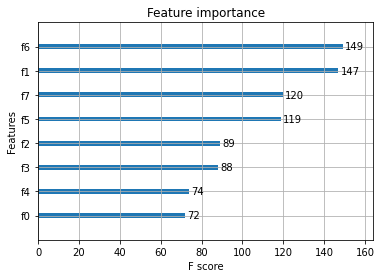

In [18]:
from xgboost import plot_importance
plot_importance(model);

# Melhores Dicas
## Configuração
### learning_rate = 0.1 ou menor
### max_depth = (2-8)
### subsample = (30-80)% comparada a 100% para nenhuma amostragem

## Ponto Inicial
### 1 - Executar o padrão e ver a curva de aprendizado
### 2 - Se overfeating, diminuir taxa de aprendizado e / ou aumentar número de árvores
### 3 - Se underfeating, aumentar taxa de aprendizado e / ou diminuir número de árvores

## Tunar Parametros 

In [20]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X, label_encoded_y)

NameError: name 'label_encoded_y' is not defined

In [25]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[16:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.530152 using {'learning_rate': 0.01}
-0.689563 (0.000760) with: {'learning_rate': 0.0001}
-0.660868 (0.006202) with: {'learning_rate': 0.001}
-0.530152 (0.034452) with: {'learning_rate': 0.01}
-0.552723 (0.117636) with: {'learning_rate': 0.1}
-0.653341 (0.171609) with: {'learning_rate': 0.2}
-0.718789 (0.176641) with: {'learning_rate': 0.3}


C:\Users\flavio.sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
